In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def generate_data(means, covariances, sample_counts):
    np.random.seed(42)
    samples = []
    labels = []
    for i, (mu, cov, n_samples) in enumerate(zip(means, covariances, sample_counts)):
        s = np.random.multivariate_normal(mu, cov, n_samples)
        samples.append(s)
        labels.append(np.full(n_samples, i))
    X = np.vstack(samples)
    y_true = np.concatenate(labels)
    return X, y_true

means_a = [np.array([1, 1]), np.array([5, 5]), np.array([9, 1])]
covs = [
    np.array([[1, 0.4], [0.4, 1]]),
    np.array([[1, -0.6], [-0.6, 1]]),
    np.array([[1, 0], [0, 1]])
]
sample_counts = [150, 300, 100]

# Generate data
X_a, y_true_a = generate_data(means_a, covs, sample_counts)

In [21]:
def kmeans(X, K, max_iters=100, tol=1e-4):
    N, D = X.shape
    # Randomly initialize cluster centers
    centers = X[np.random.choice(N, K, replace=False)]

    for it in range(max_iters):
        # Step 1: Assign labels
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)  # (N, K)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centers
        new_centers = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Check convergence
        if np.linalg.norm(new_centers - centers) < tol:
            break
        centers = new_centers

    return labels, centers

def plot_kmeans(X, K, title):
    labels, centers = kmeans(X, K)
    plt.figure(figsize=(5,5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
    plt.title(f"{title} (K={K})")
    plt.grid(True)
    plt.show()
    


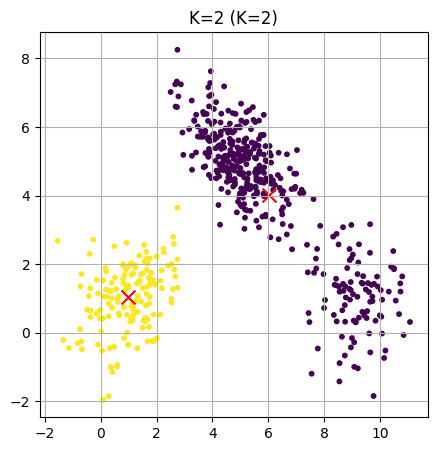

In [23]:
plot_kmeans(X_a, 2, "K=2")


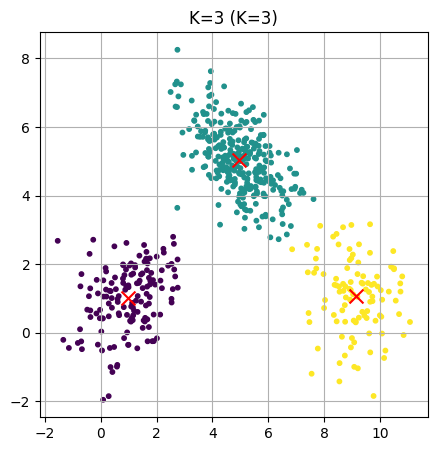

In [24]:
plot_kmeans(X_a, 3, "K=3")

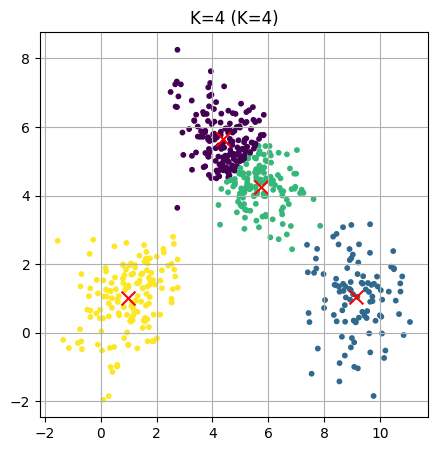

In [25]:
plot_kmeans(X_a, 4, "K=4")